# HAMOYE DATA SCIENCE INTERNSHIP STAGE B

### **NAME:** MBA GOSPEL GIFT

Dataset Description

The dataset for the remainder of this quiz is the Appliances Energy Prediction data. The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). The attribute information can be seen below.

Attribute Information:

Date, time year-month-day hour:minute:second

Appliances, energy use in Wh

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â °C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

To answer some questions, you will need to normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a  random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set.



In [11]:
# Importation of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


from sklearn.model_selection import train_test_split

In [12]:
# import the dataset
df = pd.read_csv('energydata_complete.csv')
df.head(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


### BASIC EDA

In [3]:
# check for dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
# examine the numerical columns
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [5]:
# check for missing data
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

No missing value

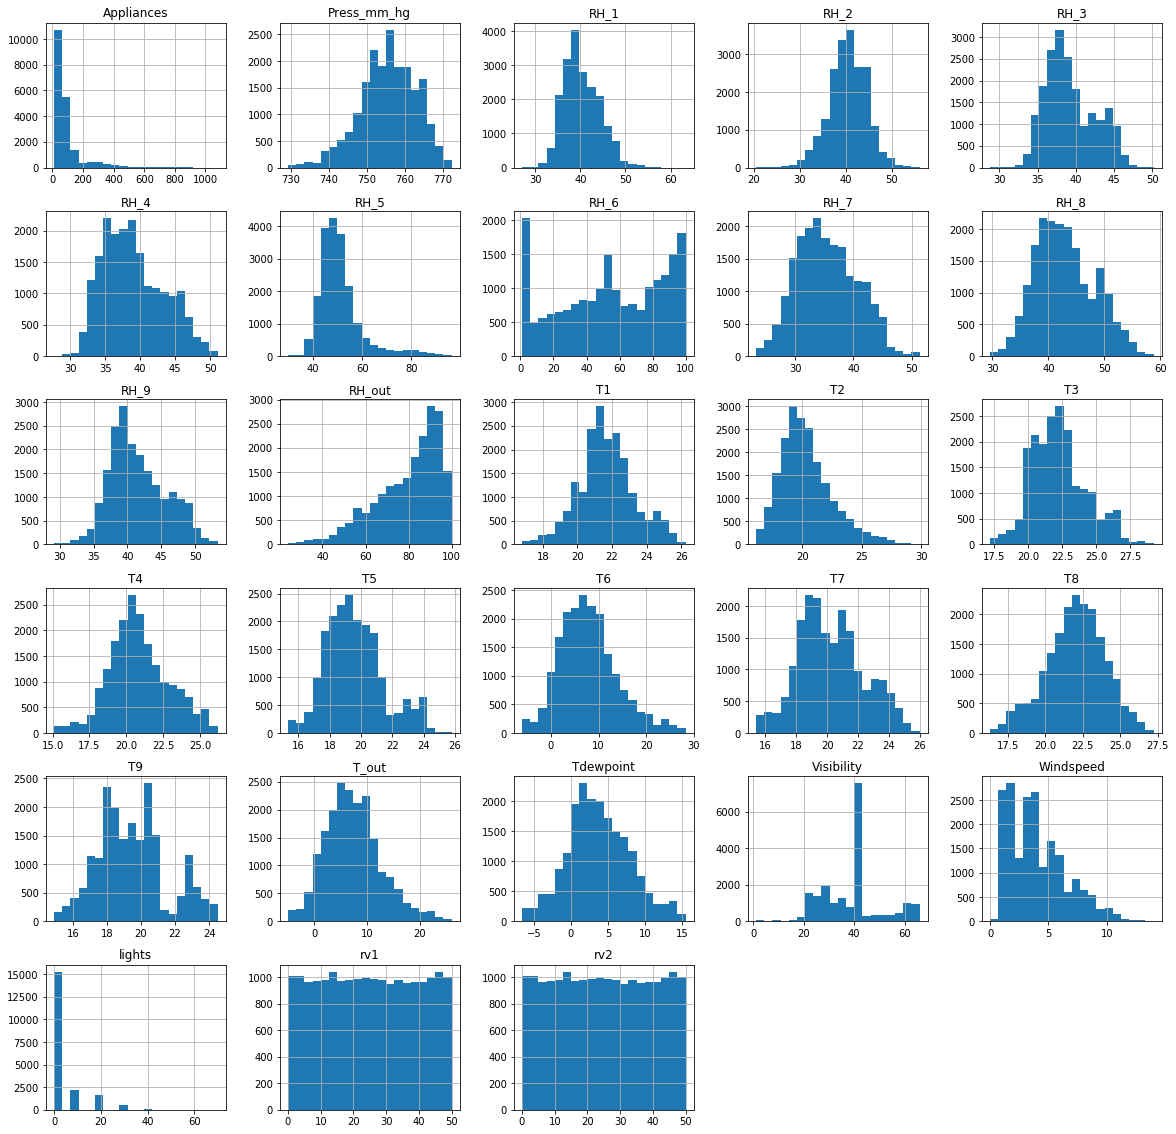

In [10]:
df.hist(bins = 20, figsize=(20,20));

**Observations:**

    1. Light histogram shows that there are more zero values in the column, hence, it is useless
    2. The relative humidity values (except RH_6 and RH_out) follows a normal distribution
    3. The target column histogram differs from every other column histogram, and slightly differs from windspeed
    4. Finally, skewness is observed in windspeed, RH_out and appliancs

In [13]:
# Dropping the lights and date columns respectively
df.drop(['lights', 'date'], axis=1, inplace=True)

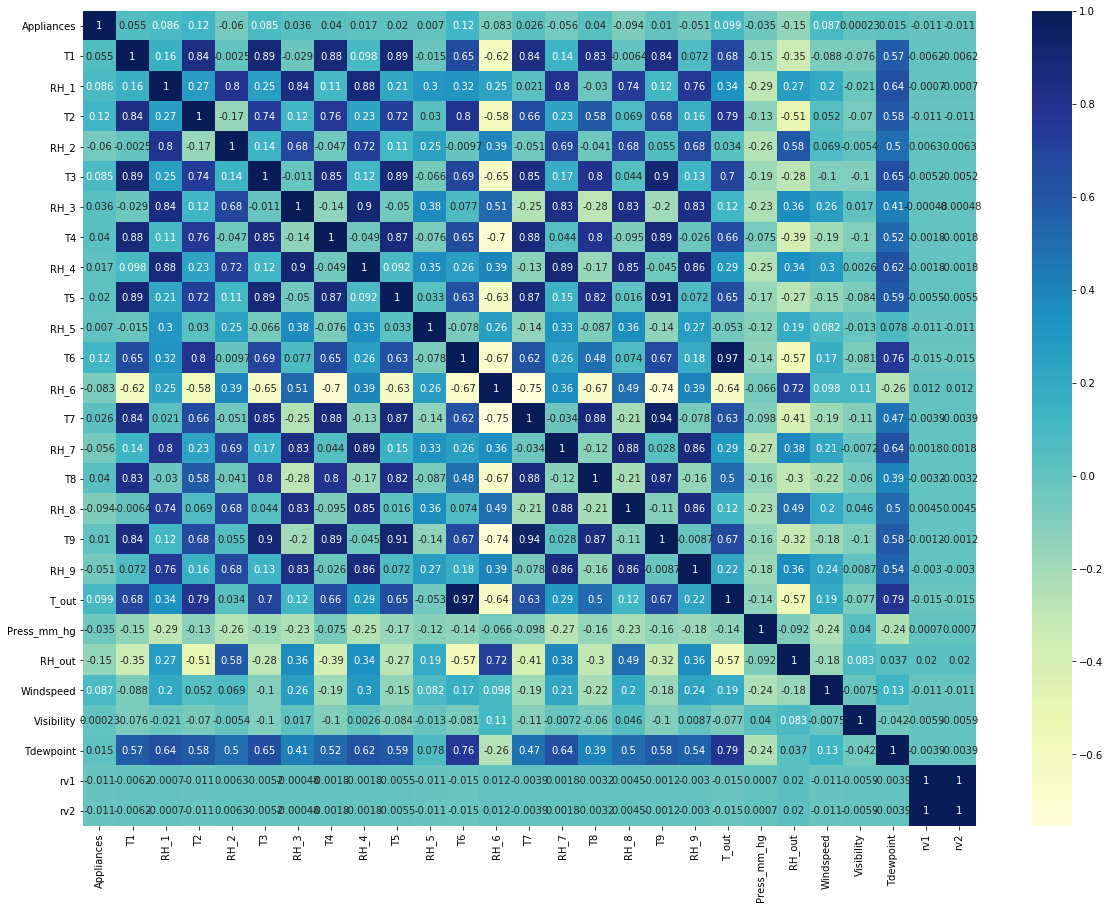

In [60]:
# Correlation plots
corr_mat = df.corr()
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr_mat, annot = True, cmap = 'YlGnBu');

### DATA PREPROCESSING

In [14]:
from sklearn.preprocessing import MinMaxScaler

# instantiate the scaler
scaler = MinMaxScaler()

# normalizing the features
normalized_features = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [15]:
# splitting data into features(independent) and target(dependent) variables

# predictors
features = normalized_features.drop(['Appliances'], axis=1)

# target variable
target = normalized_features['Appliances']

In [16]:

# splitting data into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13814, 26), (5921, 26), (13814,), (5921,))

### MODELLING

In [18]:
# Fitting a Linear model
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.14890246319303535

In [20]:
model.score(X_train, y_train)

0.14471942308518737

In [22]:
# Making predictions
y_pred = model.predict(X_test)

In [23]:
# Mean Absolute Error
mean_absolute_error(y_test, y_pred)

0.050133623977429535

In [26]:
# Root Mean Squared Error
np.sqrt(mean_squared_error(y_test, y_pred))

0.0875144494766171

In [56]:
# Residual Sum of Squares
np.sum(np.power(y_test - y_pred, 2))

45.34762967266377

In [28]:
# Coefficient of Determination
r2_score(y_test, y_pred)

0.14890246319303535

In [29]:
# Feature Importance for Linear model
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.00328
Feature: 1, Score: 0.55355
Feature: 2, Score: -0.23618
Feature: 3, Score: -0.45670
Feature: 4, Score: 0.29063
Feature: 5, Score: 0.09605
Feature: 6, Score: 0.02898
Feature: 7, Score: 0.02639
Feature: 8, Score: -0.01566
Feature: 9, Score: 0.01601
Feature: 10, Score: 0.23642
Feature: 11, Score: 0.03805
Feature: 12, Score: 0.01032
Feature: 13, Score: -0.04461
Feature: 14, Score: 0.10200
Feature: 15, Score: -0.15760
Feature: 16, Score: -0.18994
Feature: 17, Score: -0.03980
Feature: 18, Score: -0.32186
Feature: 19, Score: 0.00684
Feature: 20, Score: -0.07767
Feature: 21, Score: 0.02918
Feature: 22, Score: 0.01231
Feature: 23, Score: 0.11776
Feature: 24, Score: 0.00077
Feature: 25, Score: 0.00077


In [32]:
df.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [33]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

In [61]:
# Training a Ridge Regressor model with alpha = 0.4
reg = Ridge(alpha = 0.4)
reg.fit(X_train, y_train)
y_pred_ridge = reg.predict(X_test)

In [62]:
# Root Mean Squared error of Ridge model
np.sqrt(mean_squared_error(y_test, y_pred_ridge))

0.08753385704628004

In [49]:
# Training a Lasso Regressor model with alpha = 0.001
regressor = Lasso(alpha=0.001)
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.026800880567125818

In [50]:
y_preds = regressor.predict(X_test)

In [51]:
# Root Mean Squared error of Lasso model
np.sqrt(mean_squared_error(y_test, y_preds))

0.09358170467245137

In [52]:
Feature importanc for Lasso Regressor model
importance = regressor.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.01788
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: -0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: -0.00000
Feature: 12, Score: -0.00000
Feature: 13, Score: -0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: -0.00011
Feature: 16, Score: -0.00000
Feature: 17, Score: -0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: -0.00000
Feature: 20, Score: -0.04956
Feature: 21, Score: 0.00291
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: -0.00000
Feature: 25, Score: -0.00000
